## LAB 7
***Assume that the correlation values in following table represent similarity between crimes 
mentioned in the table. Construct a distance matrix for above data and demonstrate th 
same as an application of multi-dimensional scali***ng

In [10]:
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

In [3]:
# Loading the given correlation matrix
correlation_matrix = np.array([
    [1.000, 0.52, 0.34, 0.81, 0.28,0.06, 0.11],
    [0.52, 1.000, 0.55, 0.70, 0.68, 0.60,0.44],
    [0.34, 0.55, 1.000, 0.56, 0.62, 0.44, 0.62],
    [0.81, 0.70, 0.56, 1.00, 0.52,0.32, 0.33],
    [0.28, 0.68, 0.62, 0.52, 1.00, 0.80, 0.70],
    [0.06,0.60,0.44, 0.32, 0.80, 1.00, 0.55],
    [0.11, 0.44, 0.62, 0.33, 0.70, 0.55, 1.00]
])
print(correlation_matrix)

[[1.   0.52 0.34 0.81 0.28 0.06 0.11]
 [0.52 1.   0.55 0.7  0.68 0.6  0.44]
 [0.34 0.55 1.   0.56 0.62 0.44 0.62]
 [0.81 0.7  0.56 1.   0.52 0.32 0.33]
 [0.28 0.68 0.62 0.52 1.   0.8  0.7 ]
 [0.06 0.6  0.44 0.32 0.8  1.   0.55]
 [0.11 0.44 0.62 0.33 0.7  0.55 1.  ]]


In [5]:
# Calculate distance matrix
distance_matrix = np.round(np.sqrt(2 * (1 - correlation_matrix)), 2)

print(distance_matrix)

[[0.   0.98 1.15 0.62 1.2  1.37 1.33]
 [0.98 0.   0.95 0.77 0.8  0.89 1.06]
 [1.15 0.95 0.   0.94 0.87 1.06 0.87]
 [0.62 0.77 0.94 0.   0.98 1.17 1.16]
 [1.2  0.8  0.87 0.98 0.   0.63 0.77]
 [1.37 0.89 1.06 1.17 0.63 0.   0.95]
 [1.33 1.06 0.87 1.16 0.77 0.95 0.  ]]


#### Application of Multidimensional Scaling(MDS)
-  Technique used in statistics and data analysis to visualize the pairwise distances between a set of objects in a reduced-dimensional space.
-  The goal of MDS is to represent the objects in a lower-dimensional space (typically 2D or 3D) while preserving, as much as possible, the original pairwise distances between them.

In [14]:
# Perform MDS
point_names = ['Murder', 'Rape', 'Robbery', 'Assault', 'Burglary', 'Larcency', 'Auto theft']
mds = MDS(n_components=2, dissimilarity='precomputed')
positions = mds.fit_transform(distance_matrix)

In [12]:
positions

array([[-0.78520863,  0.36235293],
       [-0.06205199,  0.42915494],
       [-0.13031256, -0.6047188 ],
       [-0.57570802, -0.04776535],
       [ 0.40243558,  0.00562341],
       [ 0.63415009,  0.38733278],
       [ 0.51669552, -0.53197991]])

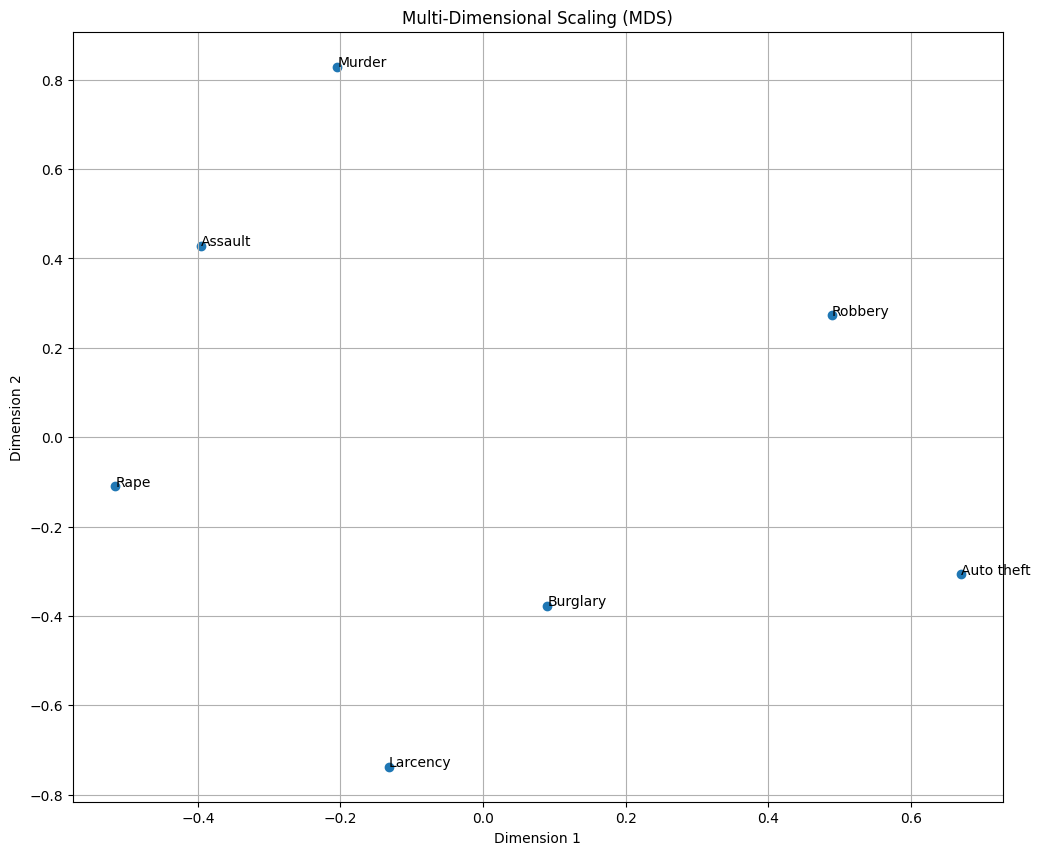

In [16]:
# Plot MDS result
plt.figure(figsize=(12, 10))
plt.scatter(positions[:, 0], positions[:, 1])

# Annotate points with names
for i, name in enumerate(point_names):
    plt.annotate(name, (positions[i, 0], positions[i, 1]))

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Multi-Dimensional Scaling (MDS)')
plt.grid(True)
plt.show()

- Here we can see the difference in the features based on the distance.

***Create a dataset which records 5 features of electronic gadget. You can consider 7 gadgets. Generate a distance matrix for this data set.***

In [18]:
# importing the libraries  
import numpy as np

In [19]:
#Loading the data
gadget_names = ['iPhone 13', 'Samsung Galaxy S21', 'Google Pixel 6', 'Sony Xperia 1 III', 'OnePlus 9 Pro', 'Xiaomi Mi 11', 'Huawei P40 Pro']

# Create a dataset representing 7 gadgets with 5 features each
gadgets_data = np.array([
    # Features: Weight (g), Size (inches), Price ($), Battery Life (hours), RAM (GB)
    [174, 6.1, 799, 15, 4],
    [171, 6.2, 899, 12, 8],
    [207, 6.4, 699, 14, 6],
    [186, 6.5, 1099, 18, 12],
    [197, 6.7, 969, 13, 8],
    [196, 6.8, 799, 16, 8],
    [209, 6.6, 899, 14, 8]
])

In [24]:
# Calculate the Euclidean distance matrix
distance_matrix = np.round(np.sqrt(np.sum((gadgets_data[:, np.newaxis] - gadgets_data) ** 2, axis=-1)),2)

print("Distance Matrix:")
print(distance_matrix)

Distance Matrix:
[[  0.   100.17 105.33 300.36 171.61  22.39 106.03]
 [100.17   0.   203.23 200.69  74.68 103.16  38.05]
 [105.33 203.23   0.   400.62 270.19 100.64 200.02]
 [300.36 200.69 400.62   0.   130.62 300.2  201.4 ]
 [171.61  74.68 270.19 130.62   0.   170.03  71.03]
 [ 22.39 103.16 100.64 300.2  170.03   0.   100.86]
 [106.03  38.05 200.02 201.4   71.03 100.86   0.  ]]


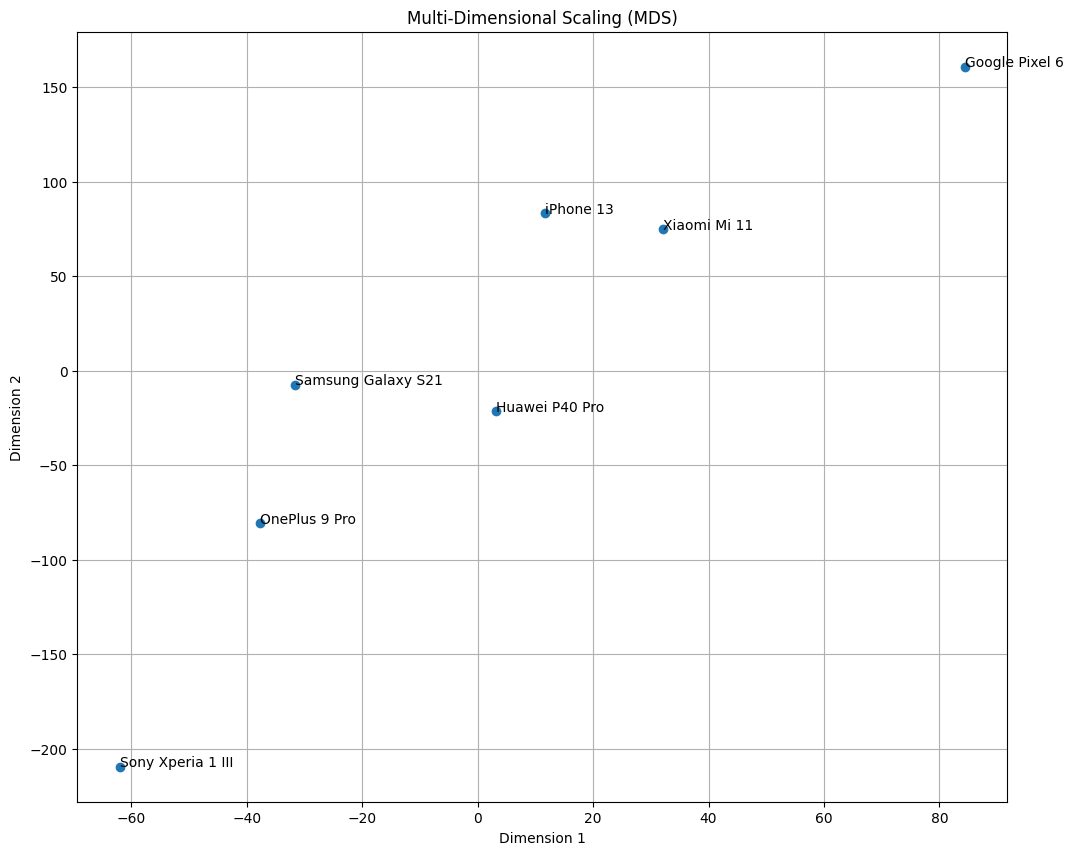

In [25]:
# Perform MDS
point_names =['iPhone 13', 'Samsung Galaxy S21', 'Google Pixel 6', 'Sony Xperia 1 III', 'OnePlus 9 Pro', 'Xiaomi Mi 11', 'Huawei P40 Pro']
mds = MDS(n_components=2, dissimilarity='precomputed')
positions = mds.fit_transform(distance_matrix)

# Plot MDS result
plt.figure(figsize=(12, 10))
plt.scatter(positions[:, 0], positions[:, 1])

# Annotate points with names
for i, name in enumerate(point_names):
    plt.annotate(name, (positions[i, 0], positions[i, 1]))

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Multi-Dimensional Scaling (MDS)')
plt.grid(True)
plt.show()

**Sony Xperia 1 III**
- Weight: Approximately 186 grams
- Size: 6.5 inches
- Price: Around $1,300 (price may vary by region and retailer)
- Battery Life: Approximately 4,500 mAh (actual battery life varies based on usage)
- RAM: 12 GB

**Google Pixel 6**
- Weight: Approximately 207 grams
- Size: 6.4 inches
- Price: Around $599 (starting price, may vary by region and model)
- Battery Life: Approximately 4,614 mAh (actual battery life varies based on usage)
- RAM: 8 GB

**OnePlus 9 Pro**
- Weight: Approximately 197 grams
- Size: 6.7 inches (Fluid AMOLED display, 120Hz refresh rate)
- Price: Around $969 (starting price, may vary by region and model)
- Battery Capacity: Approximately 4,500 mAh
- RAM: 8 GB or 12 GB options
- Processor: Qualcomm Snapdragon 888
- Camera: Quad rear cameras co-developed with Hasselblad, including a 48 MP main camera